In [ ]:
!pip install interpret
!pip install --user xgboost
!pip install pytorch-
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 45.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.9/778.9 kB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.7/264.7 kB 24.0 MB/s eta 0:00:00
  Created wh

ERROR: Invalid requirement: 'pytorch-': Expected end or semicolon (after name and no valid version specifier)
    pytorch-
           ^
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283913 sha256=be464d46253779669a3432c8da46a6f9e67847f4a6338140578232ccbedd0e77
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [ ]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 3.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from interpret import preserve, show
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

random_state=42

In [ ]:
#Setul de date Breast Cancer Wisconsin Diagnostic a fost încărcat cu ajutorul bibliotecii scikit-learn, prin funcția load_breast_cancer().
#Informațiile, inițial stocate ca array-uri NumPy, au fost transformate într-un DataFrame Pandas,
#combinând variabilele explicative (cancer['data']) cu vectorul țintă (cancer['target']) și atribuind denumiri corespunzătoare coloanelor.
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['target']))
df.target = df.target.astype(np.int64)
_class = 'target'
class_names = [0, 1]

In [ ]:
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
X, y = df.drop(columns=[_class]), df[_class]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=random_state)

In [ ]:
x_test.shape

(171, 30)

# EDA

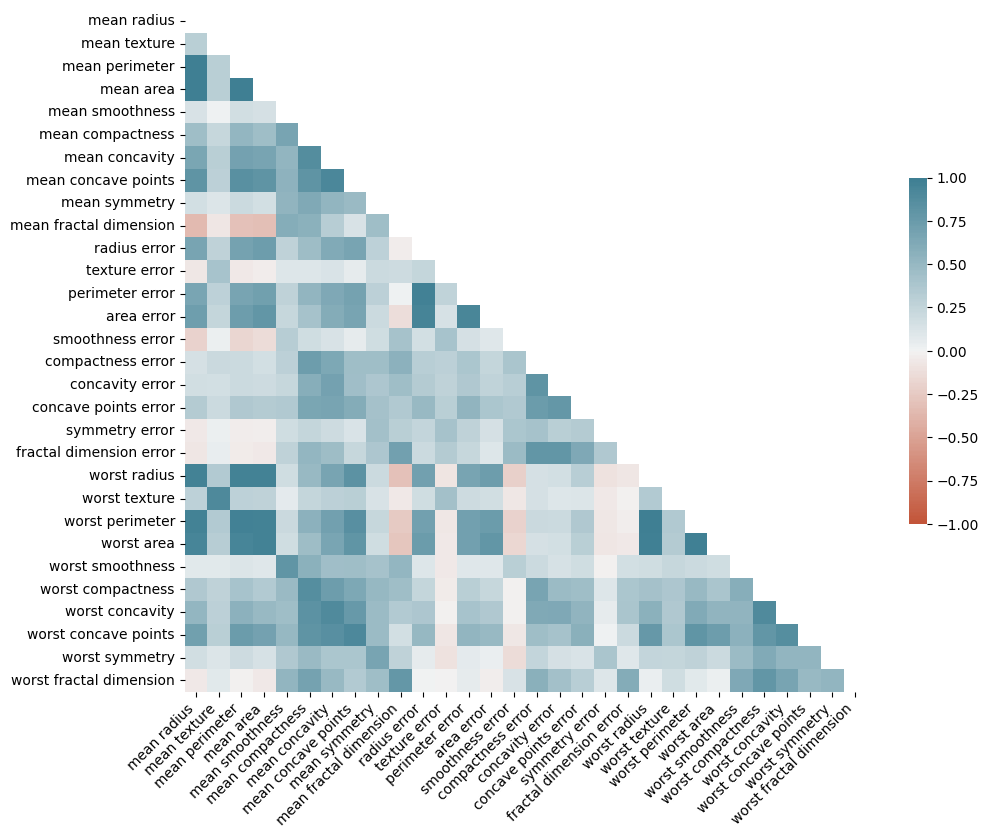

In [ ]:
data = x_train
corr = data.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
ax = sns.heatmap(
    corr, mask=mask,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,  cbar_kws={"shrink": .5}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 149 to 102
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              398 non-null    float64
 1   mean texture             398 non-null    float64
 2   mean perimeter           398 non-null    float64
 3   mean area                398 non-null    float64
 4   mean smoothness          398 non-null    float64
 5   mean compactness         398 non-null    float64
 6   mean concavity           398 non-null    float64
 7   mean concave points      398 non-null    float64
 8   mean symmetry            398 non-null    float64
 9   mean fractal dimension   398 non-null    float64
 10  radius error             398 non-null    float64
 11  texture error            398 non-null    float64
 12  perimeter error          398 non-null    float64
 13  area error               398 non-null    float64
 14  smoothness error         398 

# ML Model

In [ ]:
import sklearn.metrics
import pandas as pd
import time
import numpy as np

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from interpret.glassbox import ExplainableBoostingClassifier
from pytorch_tabnet.tab_model import TabNetClassifier

In [ ]:
random_state=42

In [ ]:
x_train

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
149       13.740         17.91           88.12      585.0          0.07944   
124       13.370         16.39           86.10      553.5          0.07115   
421       14.690         13.98           98.22      656.1          0.10310   
195       12.910         16.33           82.53      516.4          0.07941   
545       13.620         23.23           87.19      573.2          0.09246   
..           ...           ...             ...        ...              ...   
71         8.888         14.64           58.79      244.0          0.09783   
106       11.640         18.33           75.17      412.5          0.11420   
270       14.290         16.82           90.30      632.6          0.06429   
435       13.980         19.62           91.12      599.5          0.10600   
102       12.180         20.52           77.22      458.7          0.08013   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
149           0.06376         0.02881              0.01329         0.1473   
124           0.07325         0.08092              0.02800         0.1422   
421           0.18360         0.14500              0.06300         0.2086   
195           0.05366         0.03873              0.02377         0.1829   
545           0.06747         0.02974              0.02443         0.1664   
..                ...             ...                  ...            ...   
71            0.15310         0.08606              0.02872         0.1902   
106           0.10170         0.07070              0.03485         0.1801   
270           0.02675         0.00725              0.00625         0.1508   
435           0.11330         0.11260              0.06463         0.1669   
102           0.04038         0.02383              0.01770         0.1739   

     mean fractal dimension  ...  worst radius  worst texture  \
149                 0.05580  ...        15.340          22.46   
124                 0.05823  ...        14.260          22.75   
421                 0.07406  ...        16.460          18.34   
195                 0.05667  ...        13.880          22.00   
545                 0.05801  ...        15.350          29.09   
..                      ...  ...           ...            ...   
71                  0.08980  ...         9.733          15.67   
106                 0.06520  ...        13.140          29.26   
270                 0.05376  ...        14.910          20.65   
435                 0.06544  ...        17.040          30.80   
102                 0.05677  ...        13.340          32.84   

     worst perimeter  worst area  worst smoothness  worst compactness  \
149            97.19       725.9           0.09711            0.18240   
124            91.99       632.1           0.10250            0.25310   
421           114.10       809.2           0.13120            0.36350   
195            90.81       600.6           0.10970            0.15060   
545            97.58       729.8           0.12160            0.15170   
..               ...         ...               ...                ...   
71             62.56       284.4           0.12070            0.24360   
106            85.51       521.7           0.16880            0.26600   
270            94.44       684.6           0.08567            0.05036   
435           113.90       869.3           0.16130            0.35680   
102            84.58       547.8           0.11230            0.08862   

     worst concavity  worst concave points  worst symmetry  \
149          0.15640               0.06019          0.2350   
124          0.33080               0.08978          0.2048   
421          0.32190               0.11080          0.2827   
195          0.17640               0.08235          0.3024   
545          0.10490               0.07174          0.2642   
..               ...                   ...             ...   
71           0.14340               0.04786         

In [ ]:
def classify_report(clfs, dataset):
    x_train, y_train, x_test, y_test = dataset
    data = []
    for clf, name, no_df in clfs:
        if no_df:
            x_tr, x_te = x_train, x_test
        else:
            x_tr, x_te = x_train.values,  x_test.values
        clf.fit(x_tr, y_train)
        pred = clf.predict(x_te)
        f1, acc = sklearn.metrics.f1_score(y_test, pred, average='binary'), sklearn.metrics.accuracy_score(y_test, pred)
        data.append([name, f1, acc])
    df = pd.DataFrame(data, columns = ['Name', 'F1', 'Acc.'])
    df = df.sort_values(by=['F1'])
    return df

In [ ]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [15, 25, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 15, 20],
    'min_samples_leaf': [1, 4, 8],
    'bootstrap': [False]
}

# Initialize the GridSearchCV with training data only
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Print the best parameters and best score from training data
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Training Score: {grid_search.best_score_}")

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 15}
Best Training Score: 0.959746835443038


In [ ]:
from sklearn.metrics import accuracy_score
# Evaluate the best model on the test data
# best_rf = grid_search.best_estimator_
best_rf = RandomForestClassifier(**grid_search.best_params_, random_state=random_state)
best_rf.fit(x_train, y_train)
y_pred = best_rf.predict(x_test)
# Calculate accuracy on test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy}")

Test Set Accuracy: 0.9649122807017544


In [ ]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=random_state)
gbc = GradientBoostingClassifier(random_state=random_state)
_xgb = xgb.XGBClassifier(random_state=random_state)
ebm = ExplainableBoostingClassifier(random_state=random_state)
tbn = TabNetClassifier(verbose=0, seed=random_state)

clfs = [(rf, 'rf', True), (gbc, 'gbc', True), (_xgb, 'xgb', True), (ebm, 'ebm', True), (tbn, 'tbn', False)]
# clfs = [(rf, 'rf', True), (ebm, 'ebm', True), (tbn, 'tbn', False)]
dataset = x_train, y_train, x_test, y_test
classify_report(clfs, dataset)

Name        F1      Acc.
4  tbn  0.507614  0.432749
1  gbc  0.967742  0.959064
2  xgb  0.971963  0.964912
0   rf  0.977169  0.970760
3  ebm  0.986047  0.982456

# XAI

In [ ]:
# selected_model = _xgb
# For fairness of comparisions we used RF
selected_model = rf

In [ ]:
import time, datetime
from joblib import Parallel, delayed
import itertools

n_jobs = 8

In [ ]:
class_names = ['NO','YES']
feature_names = x_train.columns.to_list()
# local = lime, shap, anchor, tabnet, ebm
# global = pfi, tabnet, ebm, shap
# methods = pfi, tabnet, ebm, shap, lime, anchor
# remaining = pdp, eli5, ice, adawhip, break down

## Local

### LIME

In [ ]:
import lime
from lime import lime_tabular

In [ ]:
exp_lime=lime_tabular.LimeTabularExplainer(np.array(x_train),feature_names=x_train.columns,class_names=['NO','YES'],mode='classification')

In [ ]:

def lime_explain_instance_step(i, lim):
    warnings.filterwarnings("ignore")
    out = []
    for k in range(i, lim):
        e = exp_lime.explain_instance(x_test.values[k], selected_model.predict_proba)
        out.append(e)
    return out

# lime_explanations_list = [exp_lime.explain_instance(x_test.values[i], selected_model.predict_proba) for i in range(len(x_test))]  # sequential and slower
total = len(x_test)
out = Parallel(n_jobs=n_jobs)(delayed(lime_explain_instance_step)(i, min(total, i+int(total/n_jobs))) for i in range(0, total, int(total/n_jobs)))
lime_explanations_list = list(itertools.chain(*out))


In [ ]:
display(x_test.iloc[2:4])
display(y_test.iloc[2:4])

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
131        15.46         19.48          101.70      748.9           0.1092   
431        12.40         17.68           81.47      467.8           0.1054   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
131            0.1223         0.14660              0.08087         0.1931   
431            0.1316         0.07741              0.02799         0.1811   

     mean fractal dimension  ...  worst radius  worst texture  \
131                 0.05796  ...         19.26          26.00   
431                 0.07102  ...         12.88          22.91   

     worst perimeter  worst area  worst smoothness  worst compactness  \
131           124.90      1156.0            0.1546             0.2394   
431            89.61       515.8            0.1450             0.2629   

     worst concavity  worst concave points  worst symmetry  \
131           0.3791                0.1514          0.2837   
431           0.2403                0.0737          0.2556   

     worst fractal dimension  
131                  0.08019  
431                  0.09359  

[2 rows x 30 columns]

131    0
431    1
Name: target, dtype: int64

In [ ]:
id_to_explain = 2
lime_explanations_list[id_to_explain].show_in_notebook(show_table=True)

In [ ]:
id_to_explain = 3
lime_explanations_list[id_to_explain].show_in_notebook(show_table=True)

### SHAP

In [ ]:
import shap
shap.plots.initjs()

In [ ]:
exp_shap = shap.TreeExplainer(selected_model)
shap_values = exp_shap.shap_values(x_test)

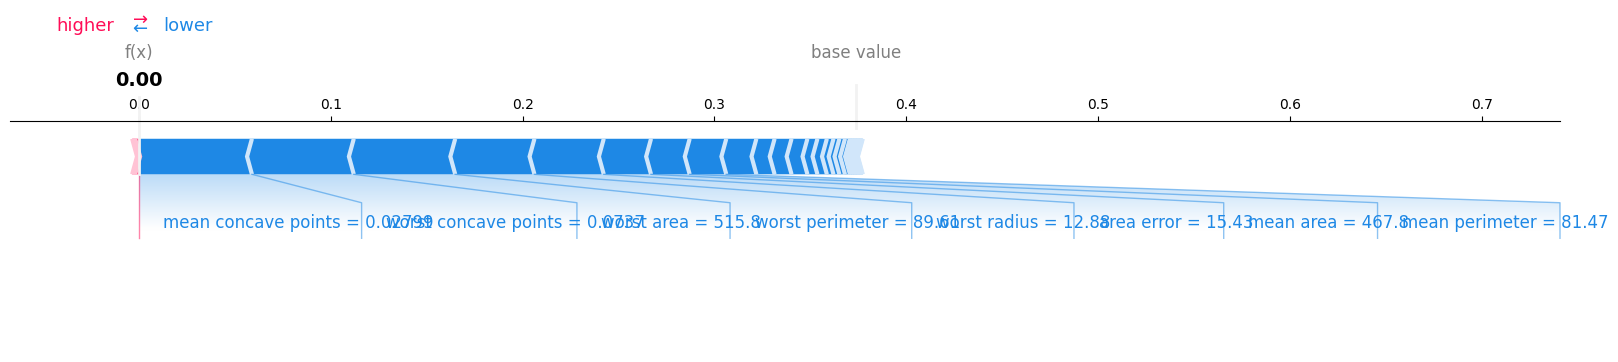

In [ ]:
shap_html = shap.force_plot(exp_shap.expected_value[0],
                            shap_values[id_to_explain][:, 0],
                            x_test.iloc[id_to_explain],
                            matplotlib=True)

In [ ]:
exp_shap_values = exp_shap(x_test)

In [ ]:
# print(exp_shap.expected_value + sum(shap_values[3]))
print(exp_shap.expected_value[0] + sum(shap_values[3][:, 0]))
print(selected_model.predict_proba(x_test)[3, 0])

-5.551115123125783e-17
0.0


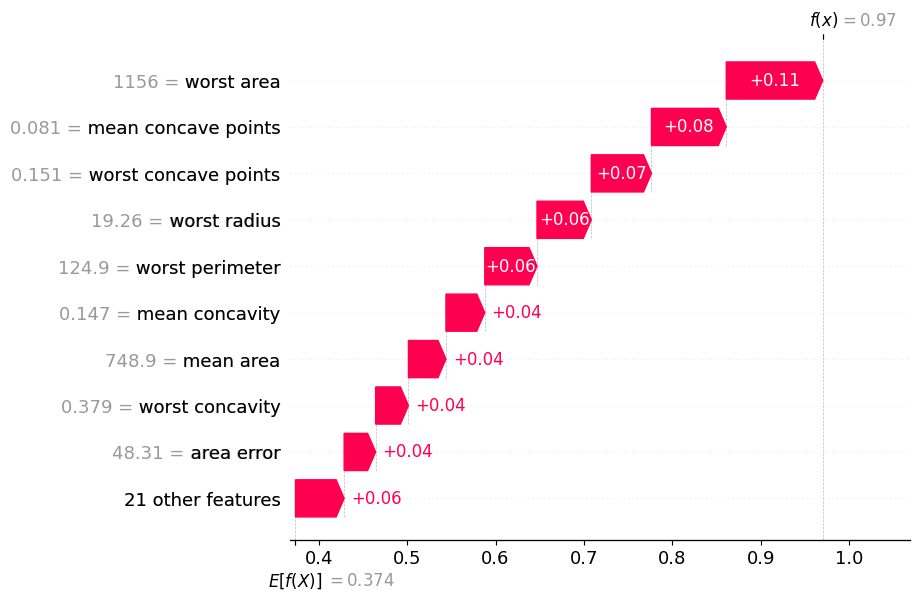

In [ ]:
id_to_explain = 2
output_to_explain = 0

# shap.plots.waterfall(exp_shap_values[id_to_explain], max_display=10)
shap.plots.waterfall(exp_shap_values[id_to_explain,:,output_to_explain], max_display=10)

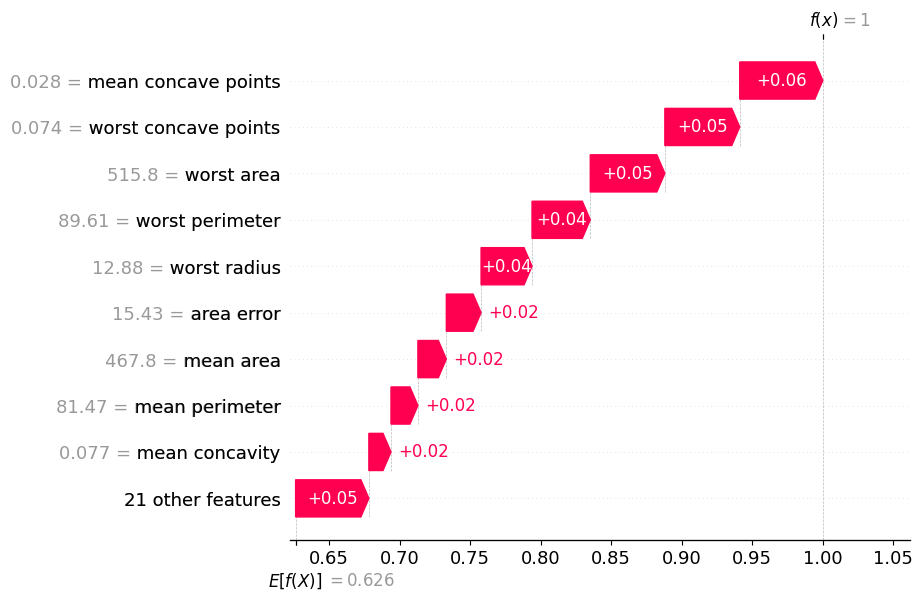

In [ ]:
id_to_explain = 3
output_to_explain = 1
# shap.plots.waterfall(exp_shap_values[id_to_explain], max_display=10)
shap.plots.waterfall(exp_shap_values[id_to_explain,:,output_to_explain], max_display=10)

#### Fidelity

In [ ]:
selected_model_predict_proba_array = selected_model.predict_proba(x_test)
selected_model_predict_array = selected_model.predict(x_test)

In [ ]:
id_to_test = 3
print('LIME', selected_model_predict_proba_array[id_to_test, 1], lime_explanations_list[id_to_test].local_pred[0])
print(int(lime_explanations_list[id_to_test].local_pred[0]>0.5))
print('SHAP', selected_model_predict_proba_array[id_to_test, 1], exp_shap.expected_value[1] + np.sum(shap_values[id_to_test][:, 1]))
print(int(exp_shap.expected_value[1] + np.sum(shap_values[id_to_test][:, 1])>0.5))
del id_to_test

LIME 1.0 0.8313335081580687
1
SHAP 1.0 0.9999999999999999
1


In [ ]:
lime_fidelity = np.mean([1-np.abs(selected_model_predict_proba_array[i, 1] - (lime_explanations_list[i].local_pred[0])) for i in range(len(x_test))])
print(f'LIME Fidelity: {lime_fidelity:.4f}')

# For SHAP, fidelity is usually high as it's designed to be an accurate representation of the model
shap_fidelity = np.mean([1-np.abs(selected_model_predict_proba_array[i, 1] - (exp_shap.expected_value[1] + np.sum(shap_values[i][:, 1]))) for i in range(len(x_test))])
print(f'SHAP Fidelity: {shap_fidelity:.4f}')

LIME Fidelity: 0.8798
SHAP Fidelity: 1.0000


In [ ]:
# accuracy_score(selected_model.predict(X_test), np.argmax(shap_values, axis=1))
from sklearn.metrics import accuracy_score

lime_predict_array = np.array([int(lime_explanations_list[i].local_pred[0]>0.5) for i in range(len(x_test))])
shap_predict_array = np.array([int(exp_shap.expected_value[1] + np.sum(shap_values[i][:, 1])>0.5) for i in range(len(x_test))])

print(f'LIME Fidelity (Predict): {accuracy_score(selected_model_predict_array, lime_predict_array):.4f}')
print(f'SHAP Fidelity (Predict): {accuracy_score(selected_model_predict_array, shap_predict_array):.4f}')

LIME Fidelity (Predict): 0.9708
SHAP Fidelity (Predict): 1.0000


In [ ]:
differing_indices = np.where(selected_model_predict_array != shap_predict_array)[0]
differing_indices

array([], dtype=int64)

In [ ]:
for id_to_test in differing_indices:
    print('LIME', selected_model_predict_proba_array[id_to_test, 1], lime_explanations_list[id_to_test].local_pred[0])
    print(int(lime_explanations_list[id_to_test].local_pred[0]>0.5))
    print('SHAP', selected_model_predict_proba_array[id_to_test, 1], exp_shap.expected_value[1] + np.sum(shap_values[id_to_test][:, 1]))
    print(int(exp_shap.expected_value[1] + np.sum(shap_values[id_to_test][:, 1])>0.5))

In [ ]:
# lime_fidelity = np.mean([np.abs(selected_model_predict_proba_array[i, 0] - (lime_explanations_list[i].local_pred[0])) for i in range(len(x_test))])
# print(f'LIME Fidelity: {lime_fidelity:.2f}')

# # For SHAP, fidelity is usually high as it's designed to be an accurate representation of the model
# shap_fidelity = np.mean([np.abs(selected_model_predict_proba_array[i, 1] - (exp_shap.expected_value[0] + np.sum(shap_values[i][:, 0]))) for i in range(len(x_test))])
# print(f'SHAP Fidelity: {shap_fidelity:.2f}')

In [ ]:
# # accuracy_score(selected_model.predict(X_test), np.argmax(shap_values, axis=1))
# from sklearn.metrics import accuracy_score

# lime_predict_array = np.array([1 if lime_explanations_list[i].local_pred[0]>0.5 else 0 for i in range(len(x_test))])
# shap_predict_array = np.array([0 if exp_shap.expected_value[0] + np.sum(shap_values[i][:, 0])>exp_shap.expected_value[0] + np.sum(shap_values[i][:, 1]) else 1 for i in range(len(x_test))])

# print(f'LIME Fidelity (Predict): {accuracy_score(selected_model_predict_array, lime_predict_array):.4f}')
# print(f'SHAP Fidelity (Predict): {accuracy_score(selected_model_predict_array, shap_predict_array):.4f}')

### EBM

In [ ]:
ebm_local = ebm.explain_local(x_test, y_test, name='EBM')

In [ ]:
# show(ebm.explain_local(x_test[554:555+1], y_test[554:555+1]), 0)
preserve(ebm_local, 2)
preserve(ebm_local, 3)

### TABNET

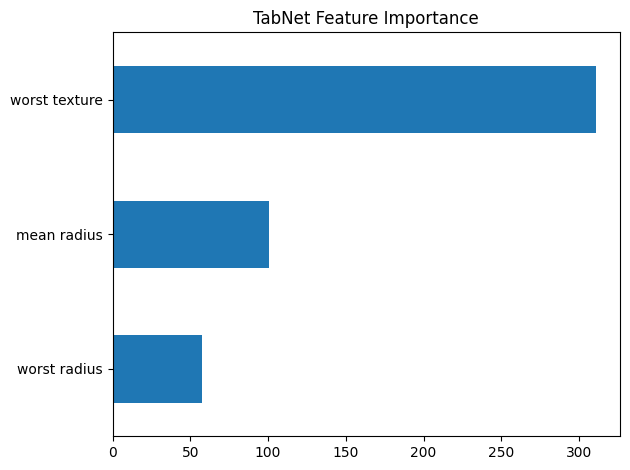

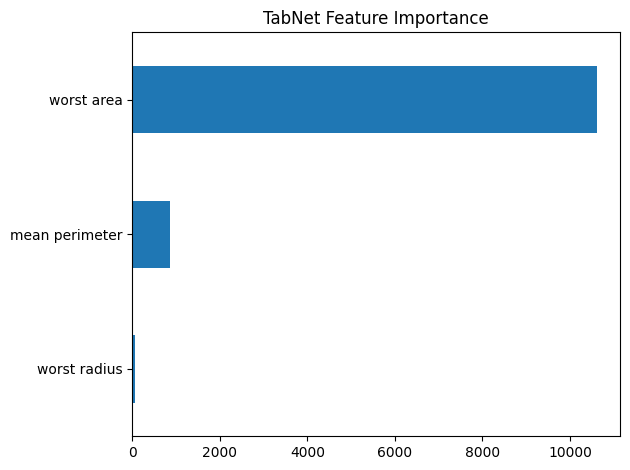

In [ ]:
explain_tabnet_matrix, tabnet_masks = tbn.explain(x_test.values)

def get_tbn_local_graph(idx, feature_names):
    m = explain_tabnet_matrix[idx]>0
    ax = pd.Series(explain_tabnet_matrix[idx][m], index=np.array(feature_names)[m]).sort_values(ascending=True).plot.barh()
    ax.set_title("TabNet Feature Importance")
    ax.figure.tight_layout()
    plt.show()

get_tbn_local_graph(2, feature_names)
get_tbn_local_graph(3, feature_names)

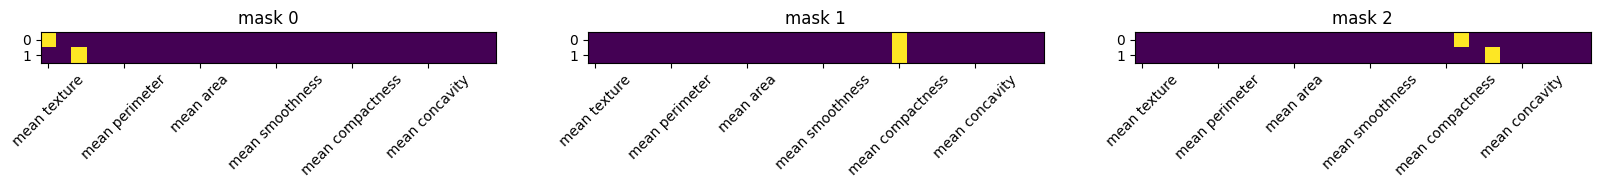

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20,20))


for i in range(3):
    axs[i].imshow(tabnet_masks[i][2:4])
    axs[i].set_title(f"mask {i}")
    axs[i].set_xticklabels(labels = feature_names, rotation=45)

#### Simplicity

In [ ]:
# https://link.springer.com/chapter/10.1007/978-3-031-20319-0_30
# Simplicity is the ability to choose only the necessary and sufficient features for explaining the prediction.

# Calculate simplicity
def calculate_simplicity(_values, threshold=0.05):
    simplicity_scores = []
    for instance_value in _values:
        abs_values = np.abs(instance_value)
        num_important_features = np.sum( abs_values > (max(abs_values) *threshold))
        simplicity_scores.append(num_important_features)
    return np.mean(simplicity_scores)


def get_simplicity_dict(name, values, threshold_list=[0.1, 0.05, 0.01]):
    d = {'Method': name}
    for threshold in threshold_list:
        d[threshold] = calculate_simplicity(values, threshold)
    return d

lime_feature_values = [list(zip(*lime_explanations_list[i].as_list()))[1] for i in range(len(x_test))]
ebm_local_scroes = [ebm_local.data(i)['scores'] for i in range(len(x_test))]

list_of_scores_dict = [get_simplicity_dict(name, values) for name, values in
                       [('LIME', lime_feature_values), ('SHAP', shap_values[:,:,0]), ('EBM', ebm_local_scroes),
                        ('TABNET', explain_tabnet_matrix)]]

_df_simplicity = pd.DataFrame(list_of_scores_dict)
_df_simplicity.set_index('Method', inplace=True)
_df_simplicity


0.1       0.05        0.01
Method                                  
LIME     9.964912  10.000000   10.000000
SHAP    13.859649  17.421053   25.461988
EBM     25.134503  53.795322  104.350877
TABNET   6.210526   6.690058    7.368421

In [ ]:
# Common Top Feature Agreement

def retain_top_features(features, n=5):
    arr = np.abs(features)
    # Get the indices of the top n maximum values
    indices = np.argpartition(arr, -n)[-n:]

    # Create a mask
    mask = np.zeros_like(arr, dtype=bool)
    mask[indices] = True
    return np.where(mask, features, 0)

# lime_explanations_list[554].show_in_notebook(show_table=True)
# shap.plots.waterfall(exp_shap_values[554,:,output_to_explain], max_display=3)
def get_lime_feature_importance(lime_exp):
    feature_importance = {}
    for feature, sc in lime_exp.as_list():
        # print(feature)
        # Split feature by '<', '>', or '=' and take the first part as the feature name
        if feature.find('< ')>-1:
            feature = feature.split(' < ')[1]
        feature = feature.split(' > ')[0].strip()
        feature = feature.split(' <= ')[0].strip()
        for f in ['>', '<', '=']:
            if feature.find(f)>-1:
                print('error', feature)
        feature_importance[feature] = sc
    # print(feature_importance)
    # print([feature_importance.get(feature, 0) for feature in feature_names])
    return np.array([feature_importance.get(feature, 0) for feature in feature_names])

# lime_weights = dict(lime_explanations_list[0].as_list())
# lime_weights.get('Number_of_ANC_Visits', 0)
# pd.DataFrame([(shap_values[i][:, 0][1], get_lime_feature_importance(lime_explanations_list[i])[1]) for i in range(20)]).corr()
print(feature_names)

np.nonzero(retain_top_features(shap_values[2][:, 1], 2))[0], np.nonzero(retain_top_features(get_lime_feature_importance(lime_explanations_list[2]), 2))[0]

['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


(array([ 7, 23]), array([13, 23]))

In [ ]:
import numpy as np
from scipy.stats import ttest_rel, wilcoxon
from scipy.stats import shapiro

shap_val = lambda x, top_n=2: retain_top_features(shap_values[x][:, 1], top_n)
lime_val = lambda x, top_n=2: retain_top_features(get_lime_feature_importance(lime_explanations_list[x]), top_n)

def check_significant_differnce(dist1, dist2, top_n=2):
    data_process_1 = dist1
    data_process_2 = dist2

    # Shapiro-Wilk test
    # Shapiro-Wilk Test: If the p-value is less than 0.05, the null hypothesis that the data is normally distributed is rejected.
    for data in [data_process_1, data_process_2]:
        stat, p_value = shapiro(data)
        if not p_value<0.05:
            print('Alert: Normally distributed')
            print(f'Shapiro-Wilk test: Statistics={stat}, p-value={p_value}')


    # A suitable test in this context would be the paired t-test if the data is normally distributed or the Wilcoxon signed-rank test if the data is not normally distributed.
    # Paired t-test
    # t_statistic, p_value_ttest = ttest_rel(data_process_1, data_process_2)
    # print(f"Paired t-test: t-statistic = {t_statistic}, p-value = {p_value_ttest}")

    # Wilcoxon signed-rank test
    w_statistic, p_value_wilcoxon = wilcoxon(data_process_1, data_process_2)
    # print(f"Wilcoxon signed-rank test: w-statistic = {w_statistic}, p-value = {p_value_wilcoxon}")
    if p_value_wilcoxon<0.05:
        print('Alert: significant difference')

    # If the p-value is less than the chosen significance level (e.g., 0.05), you reject the null hypothesis and conclude that there is a significant difference between the means of the two processes.
    return p_value_wilcoxon

lime_shap_diff_p = [ check_significant_differnce(lime_val(i, top_n=2), shap_val(i, top_n=2), ) for i in range(len(x_test))]

#### Consistency

In [ ]:
# Consistency measures how similar the explanations produced by different XAI methods are when applied to the same input data

shap_val = lambda x, top_n=2: retain_top_features(shap_values[x][:, 1], top_n)
lime_val = lambda x, top_n=2: retain_top_features(get_lime_feature_importance(lime_explanations_list[x]), top_n)
tabnet_val = lambda x, top_n=2: retain_top_features(explain_tabnet_matrix[x], top_n)
from scipy.stats import spearmanr

def get_consistency(method1, method2):
    numerator = 0
    divider = 0
    avg_sp_corr_list = []
    for n in range(1, 6): #only top 5 features: 1 feature is counted 5 five times, 2 four times,.. 5th only one time.

        # Compute Spearman's rank correlation coefficient
        spearman_corr_array = np.array([spearmanr(method1(i, top_n=n), method2(i, top_n=n))[0] for i in range(len(x_test))])
        avg_spearman_corr = spearman_corr_array.mean()
        avg_sp_corr_list.append(avg_spearman_corr)

    return np.array(avg_sp_corr_list).mean()

print(f'LIME, SHAP Consistency: {get_consistency(lime_val, shap_val):.2f}')
print(f'LIME, TABNET Consistency: {get_consistency(lime_val, tabnet_val):.2f}')
print(f'TABNET, SHAP Consistency: {get_consistency(tabnet_val, shap_val):.2f}')

LIME, SHAP Consistency: 0.58
LIME, TABNET Consistency: -0.04
TABNET, SHAP Consistency: -0.06


#### Robustness

In [ ]:
def add_noise(data, noise_level=0.01):
    noise = np.random.normal(0, noise_level, data.shape)
    return data + noise

x_test_noisy = add_noise(x_test)
display(x_test_noisy)

lime_explanations_list_noisy = [exp_lime.explain_instance(x_test_noisy.values[i], selected_model.predict_proba) for i in range(len(x_test))]
shap_values_noisy = exp_shap.shap_values(x_test_noisy)
ebm_local_noisy = ebm.explain_local(x_test_noisy, y_test, name='EBM')
explain_tabnet_matrix_noisy, tabnet_masks_noisy = tbn.explain(x_test_noisy.values)

mean radius  mean texture  mean perimeter    mean area  mean smoothness  \
204    12.468707     18.617502       81.091020   481.892349         0.104367   
70     18.928324     21.297274      123.586670  1129.982045         0.067459   
131    15.461427     19.472325      101.698551   748.895208         0.116402   
431    12.413213     17.696485       81.461335   467.802774         0.087767   
540    11.514523     14.436828       74.659537   402.900381         0.092006   
..           ...           ...             ...          ...              ...   
69     12.785083     16.482275       81.372209   502.513149         0.089072   
542    14.732205     25.419882       94.681034   668.597665         0.090783   
176     9.895763     18.058704       64.602502   302.393016         0.081469   
501    13.815035     24.483314       92.335780   595.896741         0.118416   
247    12.877870     14.098329       84.943848   512.197219         0.080878   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
204          0.100494        0.071633             0.053216       0.203856   
70           0.086261        0.098144             0.076369       0.169124   
131          0.127593        0.155400             0.075706       0.201084   
431          0.119570        0.087338             0.007046       0.183498   
540          0.101759        0.068635             0.052352       0.167355   
..                ...             ...                  ...            ...   
69           0.058359        0.039691             0.039183       0.166602   
542          0.064039        0.040158             0.030121       0.178258   
176          0.135713        0.127792             0.034181       0.177821   
501          0.153735        0.129477             0.072337       0.217141   
247          0.125355        0.132468             0.024174       0.170123   

     mean fractal dimension  ...  worst radius  worst texture  \
204                0.068537  ...     14.982461      24.621597   
70                 0.078536  ...     24.860800      26.578825   
131                0.058889  ...     19.263127      26.003227   
431                0.078442  ...     12.884156      22.923850   
540                0.062666  ...     12.261447      19.673096   
..                      ...  ...           ...            ...   
69                 0.062957  ...     13.449847      19.752344   
542                0.084890  ...     16.488238      32.273609   
176                0.082442  ...     11.249748      24.403045   
501                0.080035  ...     16.007703      32.948730   
247                0.054912  ...     14.375669      17.685412   

     worst perimeter   worst area  worst smoothness  worst compactness  \
204        96.046141   677.892605          0.147309           0.240858   
70        165.888599  1865.982817          0.124945           0.234100   
131       124.895010  1155.985995          0.140320           0.242662   
431        89.621089   515.789106          0.128503           0.263669   
540        78.782115   457.798297          0.115335           0.204792   
..               ...          ...               ...                ...   
69         85.672584   554.898342          0.136709           0.077290   
542       107.392506   826.396554          0.114172           0.126486   
176        73.066158   390.205946          0.121795           0.292148   
501       106.003261   787.995952          0.177493           0.393735   
247       104.993517   639.093049          0.136030           0.574766   

     worst concavity  worst concave points  worst symmetry  \
204         0.252776              0.084322        0.299794   
70          0.268048              0.183632        0.264530   
131         0.385984              0.148000        0.303180   
431         0.235677              0.064966        0.249738   
540         0.185349              0.056632        0.238430   
..               ...                   ...             ...   
69          0.0

In [ ]:


# Function to calculate changes in explanations
def calculate_robustness(original, noisy):
    arr_org = np.array(original)
    arr_noisy = np.array(noisy)
    change_matrix = np.abs(arr_org - arr_noisy)
    divisor = max( [arr_org.max(), arr_noisy.max()] ) - min(  [arr_org.min(), arr_noisy.min()]  )  # max - min normalise
    return change_matrix.mean() / divisor  # divided in order to normalise between 0 to 1 (otherwise when the feature importance goes beyond 1 and under -1 such as in tabnet, ebm this won't normalise to 1)

def lime_robustness(original, noisy):
    means_list = []
    _max, _min = 0, 0
    for i in range(len(original)):
        d1, d2 = dict(original[i].as_list()), dict(noisy[i].as_list())
        # print(d1.keys())
        # print(d2.keys())
        v1, v2 = list(zip(*[[d1.get(f, 0), d2.get(f, 0)] for f in set(list(d1.keys())+list(d2.keys()))]))
        arr_org = np.array(v1)
        arr_noisy = np.array(v2)
        _max = max( [arr_org.max(), arr_noisy.max(), _max] )
        _min = min( [arr_org.min(), arr_noisy.min(), _min] )
        means_list.append(np.abs(arr_org - arr_noisy).mean())
    divisor = _max - _min
    return np.array(means_list).mean()/divisor # max - min normalise



print('Robustness')

print(f'LIME: {lime_robustness(lime_explanations_list, lime_explanations_list_noisy):.4f}')
print(f'SHAP: {calculate_robustness(shap_values, shap_values_noisy):.4f}')
_ebm_robustness = calculate_robustness([ebm_local.data(i)['scores'] for i in range(len(x_test))], [ebm_local_noisy.data(i)['scores'] for i in range(len(x_test))])
print(f'EBM: {_ebm_robustness:.4f}')
print(f'TABNET: {calculate_robustness(explain_tabnet_matrix, explain_tabnet_matrix_noisy):.4f}')


Robustness
LIME: 0.0444
SHAP: 0.0078
EBM: 0.0106
TABNET: 0.0000


## Global

### PMI

Elapsed time to compute the importances: 7.203 seconds


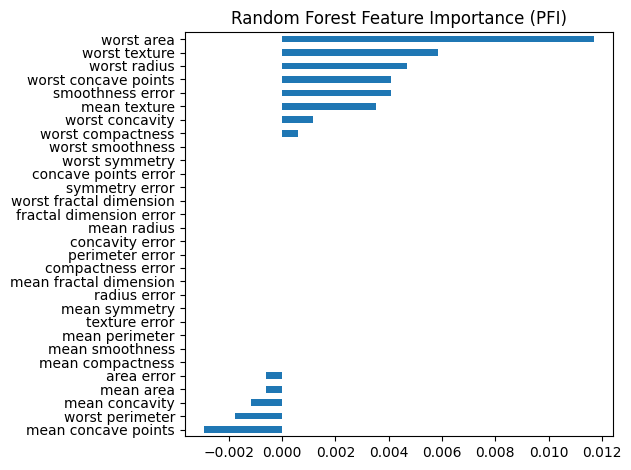

In [ ]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    selected_model, x_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

selected_model_importances = pd.Series(result.importances_mean, index=feature_names).sort_values(ascending=True)

ax = selected_model_importances.plot.barh()
ax.set_title("Random Forest Feature Importance (PFI)")
ax.figure.tight_layout()

### TABNET

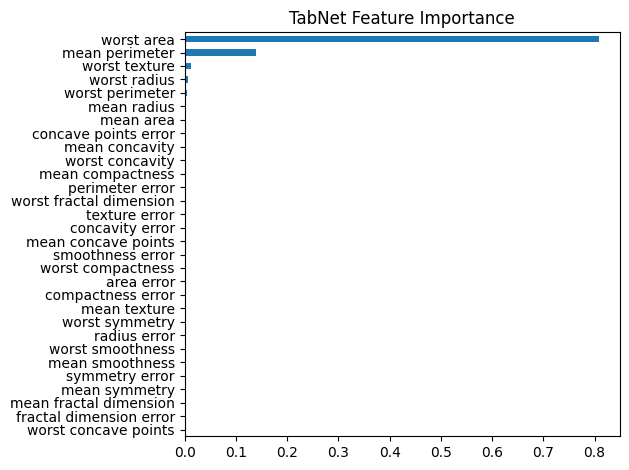

In [ ]:
ax = pd.Series(tbn.feature_importances_, index=feature_names).sort_values(ascending=True).plot.barh()
ax.set_title("TabNet Feature Importance")
ax.figure.tight_layout()

### EBM

In [ ]:
ebm_global = ebm.explain_global()
# show(ebm_global)

# Replace show with the preserve.

# ebm_global = ebm.explain_global(name='EBM')
# show(ebm_global)

# preserve(ebm_global, file_name='output/global-graph.html')
preserve(ebm_global)

### SHAP

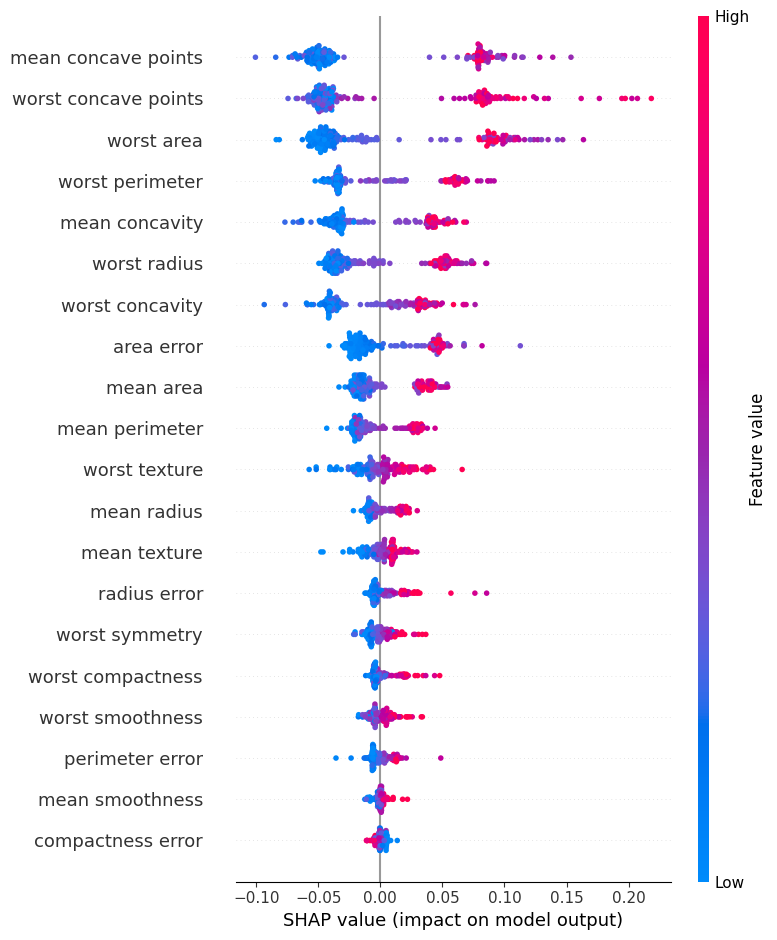

In [ ]:
shap.summary_plot(shap_values[:,:,0], x_test)
# shap.summary_plot(shap_values[:,:,0], X_test)

In [ ]:
# f.savefig("summary_plot_CS.png", bbox_inches='tight', dpi=600)